In [1]:
import os                   # to interact with the operating system
import glob

import numpy as np
import pandas as pd
import xarray as xr

import pop_tools
import gsw                  # compute potential density

import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import cmocean.cm as cmo
import matplotlib.ticker as ticker

# plot smoc time series
- all together
- shift them upaward

In [4]:
# setting up of regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

def find_corresponding_number(vvel_filename):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_number_to_find = None
    for filename in vvel_list:
        if filename.split()[1] == vvel_filename:
            vvel_number_to_find = vvel_dict[filename.split()[1]]
            break
    return vvel_number_to_find

def find_corresponding_file_name(vvel_number_to_find):
    with open(os.path.expanduser('~/phase1_CONDA/timeseries/order.txt'), 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

In [18]:
# Load data from 'events_dens_spg.csv' into a NumPy array.
data = np.genfromtxt(os.path.expanduser('~/phase1_CONDA/')+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = []

before = 40*12
after = 20*12

for i in range(len(member_numbers)):
    member_names.append(find_corresponding_file_name(member_numbers[i])[5:])

In [7]:
raw_files = glob.glob(os.path.expanduser('~/phase1_CONDA/')+'timeseries/*time_series.npy')
hist_end = (2014-1850)*12
time_annual = np.arange(1850,1850+(hist_end/12))



In [8]:

signals = np.load(raw_files[7])
signal = signals[:,member_numbers[-3]]
signal = signal[:hist_end]

# Calculate the annual means by averaging the values in each row
reshaped_data = signal.reshape(-1, 12)
annual_mean = np.mean(reshaped_data, axis=1)

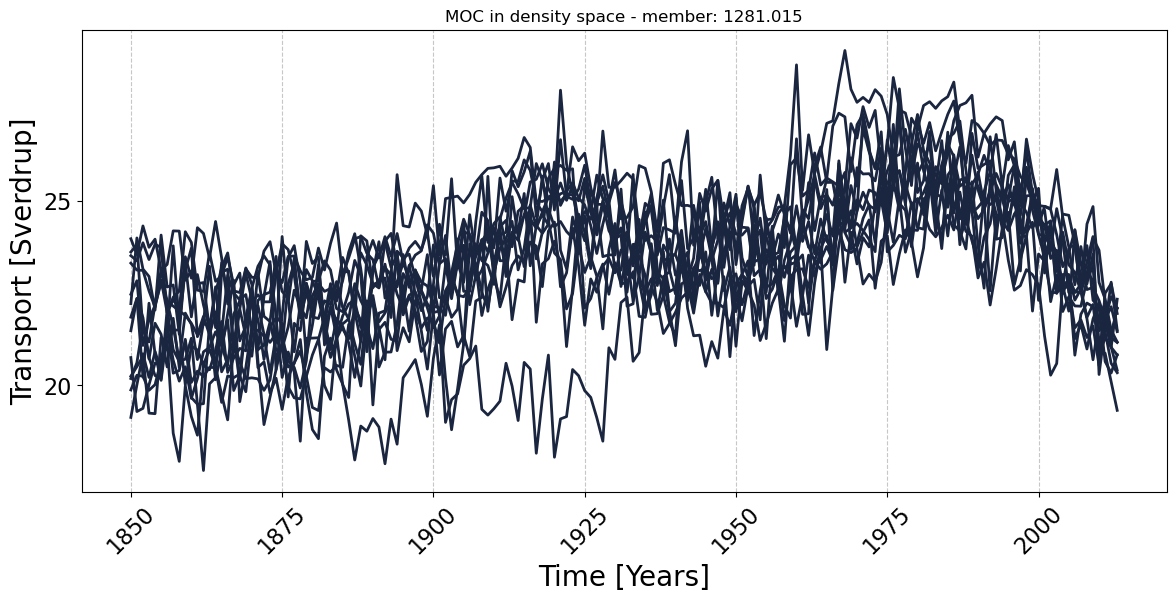

In [17]:
plt.figure(figsize=(14, 6))
#plt.plot(time_annual, annual_mean, linewidth=2, color='#1A2540')


signals = np.load(raw_files[7])
for i in range(len(member_numbers)):
    signal = signals[:,member_numbers[i]]
    signal = signal[:hist_end]

    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_mean = np.mean(reshaped_data, axis=1)
    
    #shifted_annual_mean = annual_mean + 2*i  # Shift each line plot by 5*i units
    #plt.plot(time_annual, shifted_annual_mean, linewidth=2, color='#1A2540')
   
    plt.plot(time_annual, annual_mean, linewidth=2, color='#1A2540')
    
plt.ylabel('Transport [Sverdrup]', fontsize=20)
plt.xlabel('Time [Years]', fontsize=20)
plt.title('MOC in density space - member: '+member_names[-3][:-3])
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=8)
plt.locator_params(axis='y', nbins=5)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dens_MOC_'+member_names[-3][:-3]+'.png', bbox_inches='tight', dpi=300)

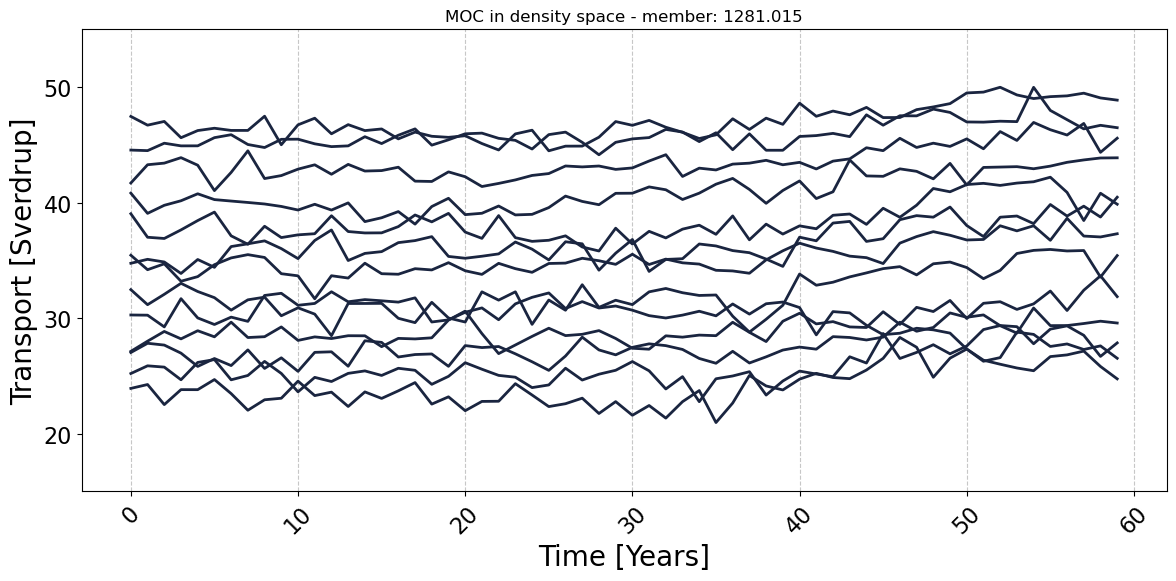

In [26]:
plt.figure(figsize=(14, 6))
#plt.plot(time_annual, annual_mean, linewidth=2, color='#1A2540')


signals = np.load(raw_files[7])
for i in range(len(member_numbers)):
    
    event = events[i]*12
    period_start = event-before
    period_end = event+after
    
    signal = signals[:,member_numbers[i]]
    signal = signal[period_start:period_end]

    # Calculate the annual means by averaging the values in each row
    reshaped_data = signal.reshape(-1, 12)
    annual_mean = np.mean(reshaped_data, axis=1)
    
    shifted_annual_mean = annual_mean + 2*i  # Shift each line plot by 5*i units
    plt.plot(shifted_annual_mean, linewidth=2, color='#1A2540')
   
    #plt.plot(annual_mean, linewidth=2, color='#1A2540')
    
plt.ylabel('Transport [Sverdrup]', fontsize=20)
plt.xlabel('Time [Years]', fontsize=20)
plt.title('MOC in density space - member: '+member_names[-3][:-3])
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.locator_params(axis='x', nbins=8)
plt.locator_params(axis='y', nbins=5)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.ylim(15,55)

plt.show()
#plt.savefig(os.path.expanduser('~/phase1_CONDA/results/')+'dens_MOC_'+member_names[-3][:-3]+'.png', bbox_inches='tight', dpi=300)